# Week 11 - Exercises 


# Introduction

For these exercises, we will investigate the predominance of coral presence in relation to temperature. We will analyze data coming from six sites within a coral reef in French Polynesia. Scientists collected data there from 2005 to 2022. The sampling design involves swimming away from the shore over the corals, and every 10 meters take a photo of the bottom surface, using a square of a defined size. This kind of data collection uses something called a "quadrat sampling design along several linear transects increasing in depth".

Once in the lab, the biodiversity is estimated in terms of surface cover. How much area of the square is occupied by each species or abiotic component (E.g. corals, algae, sand). 
Since the linear transect runs from towards the inner ocean, as the scientists swimm off-shore, depth increases and temperature decreases.

We will explore how the surface cover changes as these two conditions change.

# Main Question

_Questions: At which temperature do we find a greater percentage cover of corals? Do corals prefer warmer temperatures than the mean temperature across sites or colder temperatures?_


# Learning Objectives

With these exercises you will:
* Work with the Moorea Coral reef Long-term ecological research dataset to investigate changes in biodiversity as temperature changes.
* Define a function that resamples from our original dataset and randomly shuffles treatment assignment 
* Create and modify for loops and functions to run sampling simulations
* Visualize and analyze sampling distributions via histograms

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Exercise 1:

Create the following pandas dataframes:

+ `corals_data`: the `DataFrame` created by reading the `LTER_data` file.

+ `corals_clean`: the `DataFrame` with cleaner column names of your choice.

In [2]:
corals_data = pd.read_csv('LTER_data.csv')

co_columns = corals_data.columns

# This is absurd, isn't it? We're replacing spaces with _ and "%" with "percent" and so on.
co_columns_clean = co_columns.str.lower().str.replace(
    " ", "_").str.replace(
    "%", "percent").str.replace(
    "metres", "m").str.replace(
    "celsius", "c").str.replace(
    "temperature", "temp").str.strip("_")

corals_data.columns = co_columns_clean

corals_clean = corals_data
corals_clean

,site,quadrat,year,depth_m,temp_c,sand_percent,macroalgae_percent,microalgae_percent,corals_percent
0,LTER01,Q1.1,2005,1,27.529318,22.5,0.0,0.0,77.5
1,LTER02,Q1.1,2005,1,27.594212,0.0,0.0,2.6,97.4
2,LTER03,Q1.1,2005,1,NaN,30.1,0.0,36.7,33.2
3,LTER04,Q1.1,2005,1,NaN,21.4,0.0,57.1,21.5
4,LTER05,Q1.1,2005,1,NaN,0.6,0.0,3.6,95.8
...,...,...,...,...,...,...,...,...,...
11785,LTER02,Q5.8,2021,20,28.243200,0.0,2.2,62.2,31.9
11786,LTER03,Q5.8,2021,20,NaN,0.0,21.7,45.6,22.8
11787,LTER04,Q5.8,2021,20,28.271281,0.0,12.3,62.6,21.9
11788,LTER05,Q5.8,2021,20,28.202561,2.8,4.5,84.7,7.3


In [3]:
# Check your column names:
list(corals_clean.columns)

['site',
 'quadrat',
 'year',
 'depth_m',
 'temp_c',
 'sand_percent',
 'macroalgae_percent',
 'microalgae_percent',
 'corals_percent']

### Exercise 2

Select the columns relevant to this analysis. Those are:

+ `site`
+ `year`
+ `temp_c`
+ `corals_percent`

Name the final result `corals_select_data_raw`.

In [4]:
corals_select_data_raw = corals_data[
    ["site",
     "year",
     "temp_c",
     "corals_percent"]]

corals_select_data_raw

,site,year,temp_c,corals_percent
0,LTER01,2005,27.529318,77.5
1,LTER02,2005,27.594212,97.4
2,LTER03,2005,NaN,33.2
3,LTER04,2005,NaN,21.5
4,LTER05,2005,NaN,95.8
...,...,...,...,...
11785,LTER02,2021,28.243200,31.9
11786,LTER03,2021,NaN,22.8
11787,LTER04,2021,28.271281,21.9
11788,LTER05,2021,28.202561,7.3


### Exercise 3

A quadrat is a square in the grid.

Make a copy of `corals_select_data_raw` and name it `corals_select_data`.

Create a column indicating whether a quadrat has a greater percentage surface area of coral surface area. 

Create a column in `corals_select_data` named `'is_percent_corals_over_50'` that has the value `1` if the quadrat has a percentage surface area of corals greater than or equal to 50%, or otherwise, has the value `0`.

In [5]:
corals_select_data = corals_select_data_raw.copy()

corals_select_data.loc[corals_select_data["corals_percent"] >= 50.0,
                              "is_percent_corals_over_50"] = 1 
corals_select_data.loc[corals_select_data["corals_percent"] < 50.0,
                              "is_percent_corals_over_50"] = 0

corals_select_data

,site,year,temp_c,corals_percent,is_percent_corals_over_50
0,LTER01,2005,27.529318,77.5,1.0
1,LTER02,2005,27.594212,97.4,1.0
2,LTER03,2005,NaN,33.2,0.0
3,LTER04,2005,NaN,21.5,0.0
4,LTER05,2005,NaN,95.8,1.0
...,...,...,...,...,...
11785,LTER02,2021,28.243200,31.9,0.0
11786,LTER03,2021,NaN,22.8,0.0
11787,LTER04,2021,28.271281,21.9,0.0
11788,LTER05,2021,28.202561,7.3,0.0


### Exercise 4

Create a function to compute the difference in mean temperature between quadrats with lower coral surface area and greater coral surface area.

Name the function `mean_diff_temperature_by_coral_sa`.

The function has one parameter:
+ `data`: the `DataFrame` containing information about the coral surface area by quadrat and by temperature.

Using column `'temp_c'` in `data`, your function should compute the mean temperature of 
 of all quadrats belonging to the two groups indicated in `is_percent_corals_over_50`.

The function then returns that difference in mean temperature.

In [6]:
# Write solution here
# Give students blank code cell, they should be able to do this now
def mean_diff_temperature_by_coral_sa(data):
    
    mean_temp_high_coral_sa = \
        (data.loc[data["is_percent_corals_over_50"]==1,
            "temp_c"]).mean()
    
    mean_temp_low_coral_sa = \
        (data.loc[data["is_percent_corals_over_50"]==0,
            "temp_c"]).mean()
    
    return mean_temp_low_coral_sa - mean_temp_high_coral_sa

### Exercise 5

Call your function to calculate the observed difference in mean temperature between quadrats with low coral surface area and greater coral surface area, and name your result `observed_diff_in_mean_temperature`.

(Later on, you're going to call that function inside a for loop to compute a sampling distribution.)

In [7]:
observed_diff_in_mean_temperature = mean_diff_temperature_by_coral_sa(
    corals_select_data)

observed_diff_in_mean_temperature

-0.06443893039795512

### Exercise 6

Now we're going to shuffle the two groups (the 1's and 0's marking whether a sample has high or low coral coverage) in order to determine if there is a meaningful difference if the group assignment is random. (This is equivalent to testing for a difference assuming the null hypothesis.)

Write a helper function that shuffles our labels (values) found in the column `is_percent_corals_over_50`. Name the function `shuffle_labels`.

The function will have one parameter:
+ `data`: the `DataFrame` containing information about the coral surface area by quadrat AND temperature.

Your function will return a series that has shuffled the labels in the column `is_percent_corals_over_50`.


In [8]:
# Solution
def shuffle_labels(data):
    
    return data["is_percent_corals_over_50"].\
        sample(frac=1, replace=False).reset_index(drop=True)

### Exercise 7 

Simulate the sample means to generate a sampling distribution.

Our null hypothesis is that there is no difference in sampling means between the two groups.

Here, we will write code for the machinery of our hypothesis test. Specifically, we will simulate samples under assumption of the null hypothesis — that is, we will generate a sampling distribution of the difference in mean temperature between our two groups of quadrats.

Brace yourselves.

We're going to collect random sampling distribution of mean differences in a list named `resample_test_statistics`. We will use this list to plot a histogram.

Here are the details:

+ Initialize `resample_test_statistics` as the empty list. (In the for loop, you'll append to this list.)
+ Write a for loop to collect 1000 outcomes.
  - Each iteration, call your `shuffle_labels` function to shuffle the labels of column `'is_percent_corals_over_50'` from `corals_shuffled_data`. Assign these shuffled labels to the column `'is_percent_corals_over_50'` in the `corals_shuffled_data` dataframe.
  - Now call your `mean_diff_temperature_by_coral_sa` function to calculate the difference in mean temperature between quadrats with low and high coral surface area in your random shuffled sample. Name this value `mean_diff`.
  - Append `mean_diff` to `resample_test_statistics`.
+ Outside of the for loop, call `pd.Series` to create a series based on list `resample_test_statistics`.

In [9]:
# Solution here
np.random.seed(2)

corals_shuffled_data = corals_select_data.copy()

resample_test_statistics = []

for _ in range(1000):
    
    resampled_labels = shuffle_labels(corals_shuffled_data)
    
    corals_shuffled_data["is_percent_corals_over_50"]=\
        resampled_labels
    
    resample_test_statistics.append(
        mean_diff_temperature_by_coral_sa(corals_shuffled_data))
    
resample_test_statistics = pd.Series(resample_test_statistics)
resample_test_statistics

0     -0.014416
1     -0.028030
2     -0.002184
3      0.014334
4     -0.006382
         ...   
995    0.007674
996   -0.028218
997   -0.011437
998    0.003823
999   -0.011267
Length: 1000, dtype: float64

### Exercise 8 

How likely are we to observe a mean difference that is as extreme as the mean difference that we observed in Exercise 5?

Calculate the p-value of the random sampling result. We can calculate a p-value by following these steps:
+ Take the absolute value of this `Series`. We do this because we want to consider both tails of our sample distribution. (`resample_test_statistics.abs()` will calculate this.)
+ Create a boolean series that is `True` if the absolute value of the test statistic is geater than or equal to the observed mean difference, `observed_diff_in_mean_temperature`.
+ Finally, determine the probability by calculating the proportion of entries that are `True` in `resample_test_statistics_series`. Name your result `p_value`. 

In [10]:
abs_test_statistics = resample_test_statistics.abs()

p_value = (abs_test_statistics >= observed_diff_in_mean_temperature).mean()

p_value

1.0

### Exercise 9 

Visualize the p-value. Although, we don't need a visualization to calculate our p-value, it might help in illustrating whether our p-value makes sense. In one plot, plot the following three things: 

+ a histogram plotting the test statistics
+ two vertical lines plotting the observed difference in mean temperature between quadrats of the two groups.

-0.06443893039795512

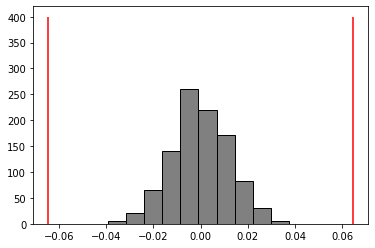

In [11]:
# Finish the code
plt.hist(resample_test_statistics, color = 'grey', edgecolor = 'black')
plt.vlines(x = observed_diff_in_mean_temperature, ymin = 0, ymax = 400, color = 'red')
plt.vlines(x = -1*observed_diff_in_mean_temperature, ymin = 0, ymax = 400, color = 'red')
observed_diff_in_mean_temperature

### Exercise 10: Interpretation Questions

1. State the difference in mean temperature between quadrats with high coral surface area and those with low coral surface area. From your results, state the p-value, and give its interpretation. What conclusions can you make from the observed p-value. __(1 mark)__

2. If you were to do further analysis to study how surface area covered by corals is different for various sampling units (Quadrats), which additional environmental variables might you consider? Why? Write 3-5 sentences identifying 1-2 variables of interest and what differences in percentage covered by corals you might expect to find. __(2 marks)__




# Regression

In [17]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pantheria = pd.read_csv("pantheria.txt", sep = "\t")

important_columns = ['5-1_AdultBodyMass_g', '23-1_SexualMaturityAge_d', 
                     '17-1_MaxLongevity_m','25-1_WeaningAge_d', 
                     '9-1_GestationLen_d']

sub_pantheria = pantheria[important_columns]

columnnames = {'5-1_AdultBodyMass_g': 'bodymass',
               '23-1_SexualMaturityAge_d': 'maturity',
               '17-1_MaxLongevity_m': 'longevity',
               '25-1_WeaningAge_d': 'weaning',
               '9-1_GestationLen_d': 'gestation'}

rn_pantheria = sub_pantheria.rename(columns = columnnames)

rn_pantheria = rn_pantheria.dropna()

panthdat_trans = rn_pantheria.copy()

panthdat_trans.head()

trans_cols = ['bodymass', 'longevity', 'gestation', 'weaning', 'maturity']

panthdat_trans[trans_cols] = (panthdat_trans[trans_cols].apply(np.log))

panthdat_trans.head()


,bodymass,maturity,longevity,weaning,gestation
0,13.107685,7.574528,6.173786,5.964556,5.957158
1,9.248839,5.520981,4.919981,3.968214,4.174387
2,9.175614,5.916822,5.257495,4.115780,4.114801
3,9.391753,5.921310,5.568345,3.777577,4.122932
4,10.365853,6.521166,5.869297,3.802654,4.151040


### Question 1

We are interested in the shape of the distribution for maturation time. 

Make a suitable plot. 

Describe the shape of the distribution and explain the role of log-transformation in generating this shape.

_Answer: Our data were originally lopsided. Calculating the logarithm of the measurements helps to bring the more spread out extreme values closer together and yield a more even and less lopsided frequency distribution. This will help us to better plot our data with body size and to fit a regression model._

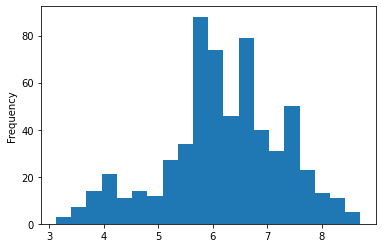

In [18]:
panthdat_trans['maturity'].plot.hist(bins=20)
plt.show()

### Question 2
 Furthermore, it makes sense to visualize our data before we fit our regression model. Create scatter plot of temperature and the proportion of corals on the reef. 
 What is the direction of the relationship. Describe the strength of the relationship.

_Answer: The relationship is 'positive' - that is, the two variables are positively 
correlated. As the independent variable increases, so does the dependent variable._

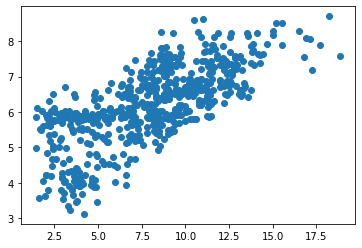

In [19]:

plt.scatter(panthdat_trans['bodymass'],
            panthdat_trans['maturity'])

plt.show()

### Question 3

Fit the linear regression line with bodymass as the independent variable.
 Print the summary of the model.
 Report the coefficient that the model estimates, giving an interpretation
 for each.


_Answer: 
    The coefficient estimate is 4.4298. That 
 means that a longer time to maturation is associated with larger body masses, meaning that larger mammals take longer to grow up._

In [20]:
from statsmodels.formula.api import ols


regmod = ols('maturity ~ bodymass', data = panthdat_trans) # setup the model

regmod_fit = regmod.fit() # estimate/fit the model 

print(regmod_fit.summary()) # get parameter estimates


                            OLS Regression Results                            
Dep. Variable:               maturity   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     636.6
Date:                Fri, 08 Apr 2022   Prob (F-statistic):           2.46e-96
Time:                        17:40:56   Log-Likelihood:                -684.03
No. Observations:                 603   AIC:                             1372.
Df Residuals:                     601   BIC:                             1381.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4298      0.076     58.251      0.0

### Question 4

Determine and interpret the R-squared value of the model. What does this metric tell us about our regression model?

_A: The R-squared is 0.514. This means that the regression model explains the relationship between the variables pretty well, but that there is some unexplained variation as well._


In [21]:
print(regmod_fit.rsquared)

0.5143670148040209


### Question 5 (BONUS)
 Calculate the residuals of the regression model. Use a scatter plot
 to plot the residuals (y-axis) against the fitted values (x-axis).
 Comment on any patterns (or lack of patterns you might see). Are the values fairly evenly distributed?



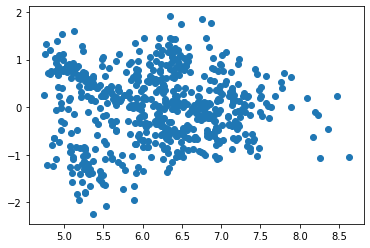

In [22]:
residuals = regmod_fit.resid
fitted = regmod_fit.fittedvalues

plt.scatter(fitted, residuals)
plt.show()

# PCA 

For the PCA part we will use the `Pantheria` dataset to analyze how body size correlates with life history characteristics, such as sexual maturity, longevity, weaning age, and gestation.

### Question 1

After importing and cleaning our dataset, in the code block below, we will standardize our columns using the `StandardScaler()` tool from sklearn. What does standardization do to our values? What will be the mean and the variance of each column after this transformation?

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

traits=panthdat_trans.loc[:,:].values 

traits_scaled=pd.DataFrame(StandardScaler().fit_transform(traits))




### Question 2

Fit our PCA. Interpret the meaning of each column, and each row.

In [24]:
pca=PCA() # set up our PCA 
fit=pca.fit_transform(traits_scaled) # fit the PCA to our scaled measurements
scores = pd.DataFrame(data = fit, columns = ['pc1', 'pc2', 'pc3', 'pc4','pc5'])
scores

,pc1,pc2,pc3,pc4,pc5
0,3.115642,-0.082034,-0.233662,-0.339423,-0.032222
1,-0.486677,0.424178,-0.607547,0.229200,-0.075350
2,-0.121518,0.272429,-0.339566,0.484410,-0.072227
3,-0.063377,0.609771,-0.232341,0.785821,-0.159263
4,0.498541,0.624860,-0.089705,1.088710,0.099222
...,...,...,...,...,...
598,0.571278,-1.579216,-0.739479,0.300642,-0.304058
599,-0.803169,0.066677,0.199074,0.397065,-0.108676
600,-0.898390,0.378259,-0.115940,0.091217,0.131743
601,2.697347,-0.115673,0.002450,-0.464925,0.151173


A: The columns are principal components. Each row is a different species from the pantheria dataset. The values in each column correspond to the location of each species along the new axes created in the PCA.

### Question 3

Q: Determine the percentage of variance explained by each PC by examining the output of the `pca.explained_variance_ratio_` property of our PCA. Explain what it means for the first PC to explain a large proportion of the variance in the original dataset. Next, explain how much variation is described by the first and second PCs combined. If we make a 2-dimensional scatterplot of PC1 and PC2, what proportion of the variance in our original dataset will be represented?

In [25]:
prop_var=pca.explained_variance_ratio_ * 100
prop_var

array([75.73441727, 10.7845884 ,  5.44746907,  4.58346775,  3.4500575 ])

A: The first two PCs explain 86% of the variance in the original data. This means that, if we created a scatterplot using only the first two dimensions, we would capture 86% of the differences present in the original 5 measurements.

Text(0, 0.5, 'PC2 (11%)')

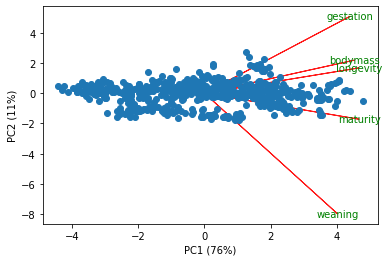

In [26]:
ax=plt.plot(scores.pc1, scores.pc2, marker='o', linestyle='')
coeff = np.transpose(pca.components_[0:3,:])
n = coeff.shape[0]
for i in range(n):
    plt.arrow(0, 0, coeff[i,0]*10, coeff[i,1]*10,color = 'r',alpha = 0.9)
    plt.text(coeff[i,0]* 10, coeff[i,1] * 10, list(panthdat_trans.columns)[i], color = 'g', ha = 'center', va = 'center')
plt.xlabel("PC1 ("+str(round(prop_var[0]))+"%)")
plt.ylabel("PC2 ("+str(round(prop_var[1]))+"%)")

Q: Examining the plot above, what can we conclude about the relationship between the variables bodymass, longevity, and weaning and PC1 and PC2?

A: Body mass and longevity are positively correlated with both one another and with PC1. Weaning is positively correlated with PC2.